In [1]:
from pysb import *

In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7fbe1448e670>

In [3]:
Monomer('enzyme', ['binding1'])

Monomer('enzyme', ['binding1'])

In [4]:
Monomer('protein', ['binding', 'state'], {'state': ['sub','pro']})

Monomer('protein', ['binding', 'state'], {'state': ['sub', 'pro']})

In [5]:
Parameter('kf',0.003)
Parameter('kr',0.001)
Parameter('kc',0.002)

Parameter('kc', 0.002)

In [6]:
Rule('binding', enzyme(binding1=None) + protein(state='sub', binding=None)
     | enzyme(binding1=1) % protein(state='sub', binding=1), kf, kr)

Rule('binding', enzyme(binding1=None) + protein(binding=None, state='sub') | enzyme(binding1=1) % protein(binding=1, state='sub'), kf, kr)

In [7]:
Rule('dissociation', enzyme(binding1=1) % protein(state='sub', binding=1) 
     >> enzyme(binding1=None) + protein(state='pro', binding=None), kc)

Rule('dissociation', enzyme(binding1=1) % protein(binding=1, state='sub') >> enzyme(binding1=None) + protein(binding=None, state='pro'), kc)

In [8]:
Parameter('enzyme_0', 100)
Parameter('protein_0', 50)
Initial(enzyme(binding1=None), enzyme_0 )
Initial(protein(binding=None, state='sub') , protein_0)

Initial(protein(binding=None, state='sub'), protein_0)

In [9]:
Observable('e_total', enzyme())
Observable('e_free', enzyme(binding1=None))
Observable('substrate', protein(binding=None, state='sub'))
Observable('product', protein(binding=None, state='pro'))
Observable('complex', enzyme(binding1=1) % 
           protein(binding=1, state='sub'))

Observable('complex', enzyme(binding1=1) % protein(binding=1, state='sub'))

In [10]:
import roadrunner
rr = roadrunner.RoadRunner()

In [11]:
from pysb import export

In [12]:
sbml_model = export.export(model, 'sbml')

In [13]:
rr = roadrunner.RoadRunner(sbml_model)
rr_result = rr.simulate(0, 100, 100)

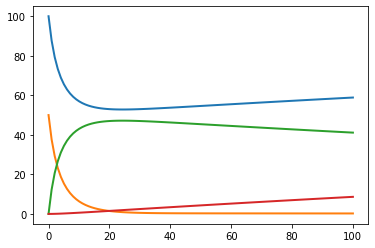

[[<matplotlib.lines.Line2D at 0x7fbe1ab4d160>],

In [15]:
rr.plot(rr_result)